# Assignment 9 - [30 points] Solutions

## <u>Case Study 1</u>: Fashion MNIST Dataset Principal Component Analysis for Quick Summarization

In this analysis, we will continue our exploration of the same random sample of the "Fashion MNIST" dataset. *As a reminder, this dataset is comprised of 500 28-by-28 pixel images of fashion items. Each of the 784 image pixels is represented by a numerical gray scale value which can range from 0 (black) to 255 (white). Each object has an associated pre-assigned class label, which corresponds to the fashion item that the image is a picture of. The 10 types of fashion items included in this dataset are: Pullover, Sandal, Bag, Ankle boot, Coat, Shirt, T-shirt/top, Sneaker, Dress, and Trousers.*

### <u>Research Goals</u>:

In this analysis, we have the following research goals.

#### Pixel Relationships that Describe the Most Amount of Variance in the Dataset

First, we would like to determine which pixel relationships describe the most amount of variance in the dataset. We will use the loading vectors from our PCA to determine this.

#### Quick Summarization of the Images

Next, we will use the loading vectors and the principal component coordinates of the objects to quickly summarize each of of the 500 objects in the dataset.


In [47]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## 1. Data Preprocessing and Cleaning

### 1.1. Before Mean Scaling

#### 1.1.1. Original Dataset
First, read the fashion_mnist_sample.csv into a dataframe. Then make a copy of this dataset that has dropped the pre-assigned class labels and has divided each of the values in this dataframe by 255. 

In [2]:
df = pd.read_csv('fashion_mnist_sample.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Dress,0,0,0,0,0,0,0,0,0,...,162,176,128,0,0,0,0,0,0,0
1,Shirt,0,0,0,0,0,0,0,0,0,...,117,57,0,0,0,0,0,0,0,0
2,Trousers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sandal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bag,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.iloc[:, 1:]/255
df_scaled = X.copy()
df_scaled["label"] = df.label

#### 1.1.2. Original Pixel Means

Calculate the mean of each of the 784 pixels. Save these 784 pixel means as an numpy array object.

**Hint:** you can convert a pandas series to a numpy array by using **np.array( pandas_series)**. 

In [12]:
mean_list = np.array(df_scaled.iloc[:, :-1].mean())
mean_list[:5]

array([0.00000000e+00, 0.00000000e+00, 7.05882353e-05, 1.41176471e-04,
       1.49019608e-04])

### 1.2. Mean Scaling

Next, mean-scale your dataset and save it as a new dataframe.

In [14]:
X = StandardScaler(with_std=False).fit_transform(X)
X

array([[ 0.00000000e+00,  0.00000000e+00, -7.05882353e-05, ...,
        -8.47058824e-03, -3.99215686e-03, -7.84313725e-04],
       [ 0.00000000e+00,  0.00000000e+00, -7.05882353e-05, ...,
        -8.47058824e-03, -3.99215686e-03, -7.84313725e-04],
       [ 0.00000000e+00,  0.00000000e+00, -7.05882353e-05, ...,
        -8.47058824e-03, -3.99215686e-03, -7.84313725e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -7.05882353e-05, ...,
        -8.47058824e-03, -3.99215686e-03, -7.84313725e-04],
       [ 0.00000000e+00,  0.00000000e+00, -7.05882353e-05, ...,
        -8.47058824e-03, -3.99215686e-03, -7.84313725e-04],
       [ 0.00000000e+00,  0.00000000e+00, -7.05882353e-05, ...,
        -8.47058824e-03, -3.99215686e-03, -7.84313725e-04]])

Checking if the mean is zero

In [17]:
np.sum(np.round(np.mean(X,axis=0), 2))

0.0

## 2. Descriptive Analytics

### 2.1. Pixel Variability

First, calculate the variance of each of the 784 pixels in your mean-scaled dataset. Display these 784 variances in a histogram.

In [20]:
#Note you want to transpose X
C = np.cov(X.T)
print(np.shape(C))

df_covariance=pd.DataFrame(C, columns=['pixel '+str(i) for i in range(0,784)], index=['pixel '+str(i) for i in range(0,784)])
df_covariance.head()

(784, 784)


,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
pixel 0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
pixel 1,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
pixel 2,0.0,0.0,6.422071e-07,1.441098e-07,2.027893e-08,7.223983e-08,-1.594577e-07,-7.389173e-07,-2.696666e-07,0.000005,...,0.000021,0.000021,0.000022,0.000033,-1.678405e-07,1.579784e-07,2.556932e-06,8.493727e-07,-2.515450e-07,-5.547427e-08
pixel 3,0.0,0.0,1.441098e-07,1.027877e-06,3.795673e-07,1.752987e-07,-3.189154e-07,-7.381776e-07,8.552283e-06,0.000023,...,0.000015,0.000007,0.000012,0.000004,-2.092366e-06,9.407573e-06,9.582625e-06,1.082365e-06,-5.647281e-07,-1.109485e-07
pixel 4,0.0,0.0,2.027893e-08,3.795673e-07,8.098627e-07,1.079899e-07,-6.268593e-08,2.508177e-06,1.651130e-05,0.000022,...,0.000023,0.000016,0.000015,0.000003,-4.573114e-06,-2.999925e-07,4.840438e-07,-6.287084e-08,-5.961019e-07,-1.171123e-07


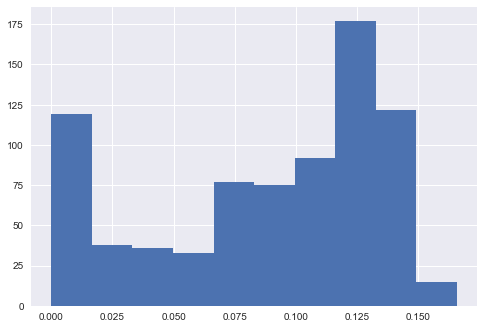

In [24]:
plt.hist(np.diag(C))
plt.show()

### 2.2. Total Pixel Variance

Calculate the sum of all of the pixel variances.

In [25]:
np.sum(np.diag(C))

68.99745631603076

## 3. Selecting the Number of Principal Components

In this case study, we would like to use PCA to learn more about what pixel relationships in the images account for the most (second most, third most, etc) amount of variance in the mean-scaled dataset. In addition, we would like to preserve as much of the mean-scaled pixel variance as possible while keeping the number of principal components that we use relatively low.


### 3.1. Percent of Total Original Pixel Variance

First, create a plot below that plots the following:
* on the x-axis is k = number of principal components used in a PCA
* on the y-axis is the percent of total (mean-scaled) original pixel variance that would be preserved by using the corresponding k principal components.

In [28]:
l, v = np.linalg.eig(C)
print('Eigenvalues of the the Covariance Matrix')
print(np.round(l[:5],3))

print('Sorted Eigenvalues of the Covariance Matrix')
l_sort=np.sort(l)[::-1]
print(np.round(l_sort[:5],3))

sort_order=np.argsort(l)[::-1]

print('Eigenvectors of the Covariance Matrix (sorted by the order of their corresponding eigenvalues)')
print('Eigenvectors of the the Covariance Matrix')
print(v[sort_order])

Eigenvalues of the the Covariance Matrix
[20.3  +0.j 12.423+0.j  4.058+0.j  3.598+0.j  2.581+0.j]
Sorted Eigenvalues of the Covariance Matrix
[20.3  +0.j 12.423+0.j  4.058+0.j  3.598+0.j  2.581+0.j]
Eigenvectors of the Covariance Matrix (sorted by the order of their corresponding eigenvalues)
Eigenvectors of the the Covariance Matrix
[[ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   1.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 1.25577188e-05+0.j -1.82835807e-07+0.j -2.91192419e-05+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 ...
 [-8.11242858e-03+0.j  8.69908042e-03+0.j  7.41857773e-03+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [-4.11038791e-02+0.j  5.49439430e-02+0.j  5.45241187e-02+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [-1.51546297e

In [31]:
np.round(np.sum(l_sort),4)

(68.9975+0j)

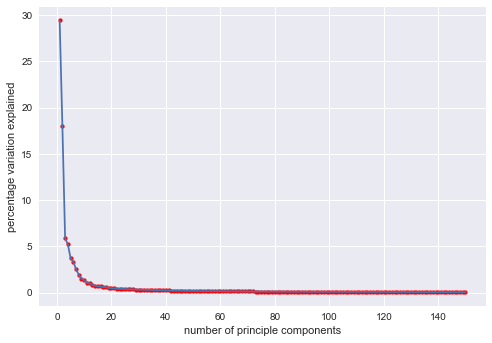

In [66]:
x = np.arange(1, 785, 1)
y = l_sort*100/np.sum(l_sort)
plt.plot(x[:150],y[:150])
plt.scatter(x[:150], y[:150], c='r', s=15)
plt.xlabel('number of principle components')
plt.ylabel('percentage variation explained')
plt.show()

<font color='orange'> I have used only 150 PCAs to show in the graph as beyong 150 its a straight line and 150 shows us how initial few PCAs are important.

### 3.2. How many principal components to use?

Suppowe we know that we would like for at least 80% of the original pixel variance to preserved in our principal components. What is the minimum number of principal components what we would need to use in order for our principal components to preserve at least 80% of the original (mean-scaled) total pixel variance?

In [54]:
number_of_PCAs_for_explaining_80_percent_variation = 0

varSum = 0
for i in y:
    if varSum<80:
        varSum+=i
        number_of_PCAs_for_explaining_80_percent_variation+= 1
    else:
        break
        
number_of_PCAs_for_explaining_80_percent_variation

20

In [55]:
varSum = 0
cumulative_sum = []
for i in y:
    if varSum<98:
        varSum+=i
        cumulative_sum.append(varSum)
    else:
        break

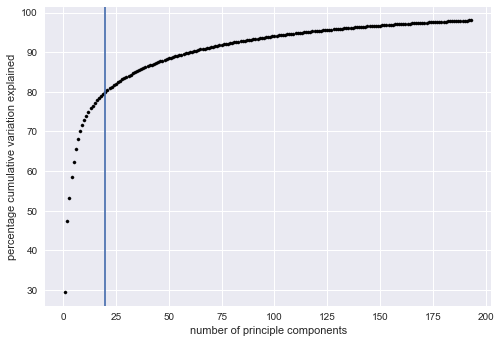

In [65]:
plt.scatter(x=np.arange(1,len(cumulative_sum)+1,1), y=cumulative_sum, s=10, c='0')
plt.axvline(x=20)
plt.xlabel('number of principle components')
plt.ylabel('percentage cumulative variation explained')
plt.show()

- We will need 20 principle components in order to explain 80% of the variation.

## 4. PCA

### 4.1. Performing PCA

Using $k$, the number of principal components that you selected in #3.2, project your mean-scaled pixel dataset onto $k$ principal components.

Use a random state of 100.

### 4.2. Pixel Relationships in the Loading Vectors

#### 4.2.1. Without Re-Adding the Pixel Means

Next, visualize each of the $k$ loading vectors in a 28-by-28 pixel image. In 4.2.1 we would like to visualize each loading vector just as they are (without re-adding the pixel means).

#### 4.2.2. Re-Adding the Pixel Means

Next, add your saved pixel means (from 1.1.2) to each of the loading vectors. Then visualize each of these "mean-added" $k$ loading vectors in the 28-by-28 pixel image.

#### 4.2.3. Interpretation

What you might have noticed is that the images in 4.2.1 have much more visible variation, distinctness, and interpretability than the images in 4.2.2.

Explore the numerical values in the vectors that we visualized above in 4.2.1 and 4.2.2 and figure out why this happened.

### 4.3. Analyzing Principal Component Coordinates

#### 4.3.1. First Two Principal Components
Next, plot your first two principal component attributes in a scatterplot. Color-code the points in your scatterplot by the fashion item labels.

#### 4.3.2. Third and Fourth Principal Components
Next, plot the third and fourth principal component attributes in a scatterplot. Color-code the points in your scatterplot by the fashion item labels.

#### 4.3.3. Boxplots of Principal Component Values

* Create a side-by-side boxplot plot, plotting the principal component 1 value for each of the 10 fashion items.
* Create a side-by-side boxplot plot, plotting the principal component 2 value for each of the 10 fashion items.
* Create a side-by-side boxplot plot, plotting the principal component 3 value for each of the 10 fashion items.

### 4.4. Principal Component 1 Interpretation

Use your results from 4.3 and 4.2.1 to answer the following questions below. You may also need to rely on prior knowledge of what each of these fashion items looks like. In assignment 6 we visualized a handful of each type of fashion item).

1.  What kind of fashion items have the highest positive median principal component 1 values? Give 2.
1.  What kind of fashion items have the highest negative median principal component 1 values? Give 3.
3.  What kind of fashion items have the lowest magnitude median principal component 1 values? Give 2.
4.  Describe the pixel relationship that accounts for the *most* amount of image variability in this dataset.

### 4.5. Principal Component 2 Interpretation

Use your results from 4.3 and 4.2.1 to answer the following questions below. You may also need to rely on prior knowledge of what each of these fashion items looks like. In assignment 6 we visualized a handful of each type of fashion item).

1.  What kind of fashion items have the highest positive median principal component 2 values? Give 2.
2.  What kind of fashion items have the highest negative median principal component 2 values? Give 2.
3.  What kind of fashion items have the lowest magnitude median principal component 2 values? Give 2.
4.  Describe the pixel relationship that accounts for the *second* most amount of image variability in this dataset.

### 4.6. Principal Component 3 Interpretation

Use your results from 4.3 and 4.2.1 to answer the following questions below. You may also need to rely on prior knowledge of what each of these fashion items looks like. In assignment 6 we visualized a handful of each type of fashion item).

1.  What kind of fashion items have the highest positive median principal component 3 values? Give 2.
2.  What kind of fashion items have the highest negative median principal component 3 values? Give 1.
3.  Describe the pixel relationship that accounts for the *third* most amount of image variability in this dataset.

### 4.7. The Variability of Sandals... Again &#128514;

#### 4.7.1. High and Low Principal Component 1 Values for Sandals

Finally, visualize the image of the sandal that has the highest magnitude value for principal component 1. Then visualize the image of the sandal that has the lowest magnitude value for principal component 1.

#### 4.7.2. Interpretation

Why do we think image with the higher principal component 1 magnitude was given a mucher higher value than the other sandal image that we looked at?

## 5. Double Checking Desired PCA Properties

### 5.1. Attribute Variances

Calculate the variances of your k principal components.

### 5.2. Percent of Total Pixel Variance

Calculate the the sum of the principal component variances. Then divide this value by the total pixel attribute variance from 2.2.

### 5.3. Covariance Matrix

Finally, calculate the covariance matrix of your principal components.